# NBA Analytics: Clustering Players by Performance Metrics.


### TABLE OF CONTENTS

>[INTRODUCTION](#INTRODUCTION)

>[IMPORTING DATA](#IMPORTING-DATA)

>[DATA MANIPULATION](#DATA-MANIPULATION)

>[EXPLORATORY DATA ANALYSIS](#-EXPLORATORY-DATA-ANALYSIS)

>[MACHINE LEARNING METHOD](#MACHINE-LEARNING-METHOD)

>[CONCLUSION](#CONCLUSION)


#[INTRODUCTION](#INTRODUCTION)

### PROBLEM DEFINITION



In the competitive realm of the NBA, understanding player performance and identifying key contributors is crucial for team success and strategic planning. This project aims to delve into the performance metrics of NBA players for the 2023 season using clustering analysis. By leveraging data science techniques, we can uncover patterns and group players into distinct clusters based on their performance indicators. These insights not only help in recognizing top performers but also in understanding the roles and contributions of different players within a team. Through a comprehensive analysis involving data preprocessing, exploratory data analysis (EDA), and the application of clustering algorithms, this project provides a nuanced understanding of player performance. The resulting clusters offer valuable information that can be used by coaches, analysts, and team managers to optimize strategies, enhance player development, and make informed decisions. By the end of this project, we aim to highlight the diverse roles of NBA players.

In [ ]:
# Load relevant packages
install.packages("factoextra")
library(factoextra)
library(readr)
library(dendextend)
library(tibble)
library(dplyr)
library(purrr)
library(cluster)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppEigen’, ‘pbkrtest’, ‘lme4’, ‘car’, ‘rstatix’, ‘FactoMineR’, ‘ggpubr’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



The necessary packages have been downloaded.

[IMPORTING DATA](#IMPORTING-DATA)

In [ ]:
# Read in the dataset
nba_data <- read_csv("nba_players_2023.csv")

Rows: 50 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): name
dbl (5): age, minutes_played_per_game, rebounds_per_game, assists_per_game, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
head(nba_data)

name,age,minutes_played_per_game,rebounds_per_game,assists_per_game,points_per_game
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Admiral Schofield,25,12.2,1.7,0.8,4.2
Damian Lillard,32,36.3,4.8,7.3,32.2
Daniel Gafford,24,20.6,5.6,1.1,9.0
Devin Booker,26,34.6,4.5,5.5,27.8
Dru Smith,25,9.1,1.5,1.7,3.3
Eugene Omoruyi,25,11.8,2.3,0.5,4.9


# NBA Players Data 2023

The dataset "NBA Players Data 2023" contains information about NBA players' performance metrics for the 2023 season. Below are the columns in the dataset along with their descriptions:

- **name**: The name of the player.
- **age**: The age of the player.
- **minutes_played_per_game**: The average number of minutes the player plays per game.
- **rebounds_per_game**: The average number of rebounds the player makes per game.
- **assists_per_game**: The average number of assists the player makes per game.
- **points_per_game**: The average number of points the player scores per game.



#[DATA MANIPULATION](#DATA-MANIPULATION)

In [ ]:
# Checking for missing values in the nba_data
colSums(is.na(nba_data))

name                     age minutes_played_per_game 
                      0                       0                       0 
      rebounds_per_game        assists_per_game         points_per_game 
                      0                       0                       0

There are no missing values

In [ ]:
# Checking data types
str(nba_data)

spc_tbl_ [50 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ name                   : chr [1:50] "Admiral Schofield" "Damian Lillard" "Daniel Gafford" "Devin Booker" ...
 $ age                    : num [1:50] 25 32 24 26 25 25 28 23 32 26 ...
 $ minutes_played_per_game: num [1:50] 12.2 36.3 20.6 34.6 9.1 11.8 32.1 28.9 18.9 35.9 ...
 $ rebounds_per_game      : num [1:50] 1.7 4.8 5.6 4.5 1.5 2.3 11.8 4.2 3.8 6.9 ...
 $ assists_per_game       : num [1:50] 0.8 7.3 1.1 5.5 1.7 0.5 5.7 3.4 1.5 3.5 ...
 $ points_per_game        : num [1:50] 4.2 32.2 9 27.8 3.3 4.9 31.1 14.9 6.9 26.6 ...
 - attr(*, "spec")=
  .. cols(
  ..   name = col_character(),
  ..   age = col_double(),
  ..   minutes_played_per_game = col_double(),
  ..   rebounds_per_game = col_double(),
  ..   assists_per_game = col_double(),
  ..   points_per_game = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


all variables are are numeric except names as expected

In [ ]:
# Creating total_stats and setting row names
nba_data <- nba_data %>%
  mutate(total_stats = points_per_game + rebounds_per_game + assists_per_game) %>%
  column_to_rownames(var = "name")

**Creating total_stats:**
- Why: Summing points_per_game, rebounds_per_game, and assists_per_game into a single total_stats metric provides a comprehensive measure of a player's overall contribution to the game. It simplifies comparisons and analyses by combining key performance indicators into one value, reflecting a player's all-around impact.

**Setting player names as row names:**
- Why: Converting the name column to row names facilitates easy identification and reference of players in subsequent analysis. It ensures that each row (i.e., each player's data) is uniquely identified by the player's name, making data manipulation and visualization more intuitive and meaningful.

#[EXPLORATORY DATA ANALYSIS](#-EXPLORATORY-DATA-ANALYSIS)

In [ ]:
# Summary statistics
summary(nba_data)

      age        minutes_played_per_game rebounds_per_game assists_per_game
 Min.   :20.00   Min.   : 2.80           Min.   : 0.90     Min.   : 0.100  
 1st Qu.:24.00   1st Qu.:16.18           1st Qu.: 3.00     1st Qu.: 1.200  
 Median :25.00   Median :27.10           Median : 4.00     Median : 1.750  
 Mean   :26.30   Mean   :24.62           Mean   : 4.55     Mean   : 3.006  
 3rd Qu.:29.75   3rd Qu.:34.23           3rd Qu.: 5.05     3rd Qu.: 4.900  
 Max.   :38.00   Max.   :37.40           Max.   :11.80     Max.   :10.200  
 points_per_game   total_stats   
 Min.   : 1.600   Min.   : 2.60  
 1st Qu.: 6.125   1st Qu.:10.43  
 Median :10.450   Median :16.70  
 Mean   :14.580   Mean   :22.14  
 3rd Qu.:26.050   3rd Qu.:37.52  
 Max.   :33.100   Max.   :49.00  

- Age:
The age of players ranges from 20 to 38 years, with an average of 26.3 years. The majority of players are between 24 and 29.75 years old.

- Minutes Played per Game:
Players average 24.62 minutes per game, with a range from 2.8 to 37.4 minutes. Half of the players play 27.1 minutes or fewer per game, indicating a mix of starters and bench players.

- Rebounds per Game:
Players average 4.55 rebounds per game, with a minimum of 0.9 and a maximum of 11.8 rebounds. Most players average between 3 and 5.05 rebounds per game, showing a few standout rebounders.

- Assists per Game:
The average assists per game is 3.006, ranging from 0.1 to 10.2 assists. While many players have lower assist numbers, a few key playmakers stand out with high assists.

- Points per Game:
Players score an average of 14.58 points per game, with a range from 1.6 to 33.1 points. Half of the players score 10.45 points or fewer, indicating a mix of role players and high scorers.

- Total Contributions per Game:
Total contributions (points + rebounds + assists) average 22.14, with values ranging from 2.6 to 49.0. This metric highlights the overall impact of players, with some contributing significantly across multiple areas.

These summary statistics highlight the diversity in player performance metrics, indicating a range of roles and contributions among players in the dataset.


### Distributions of Key Variables


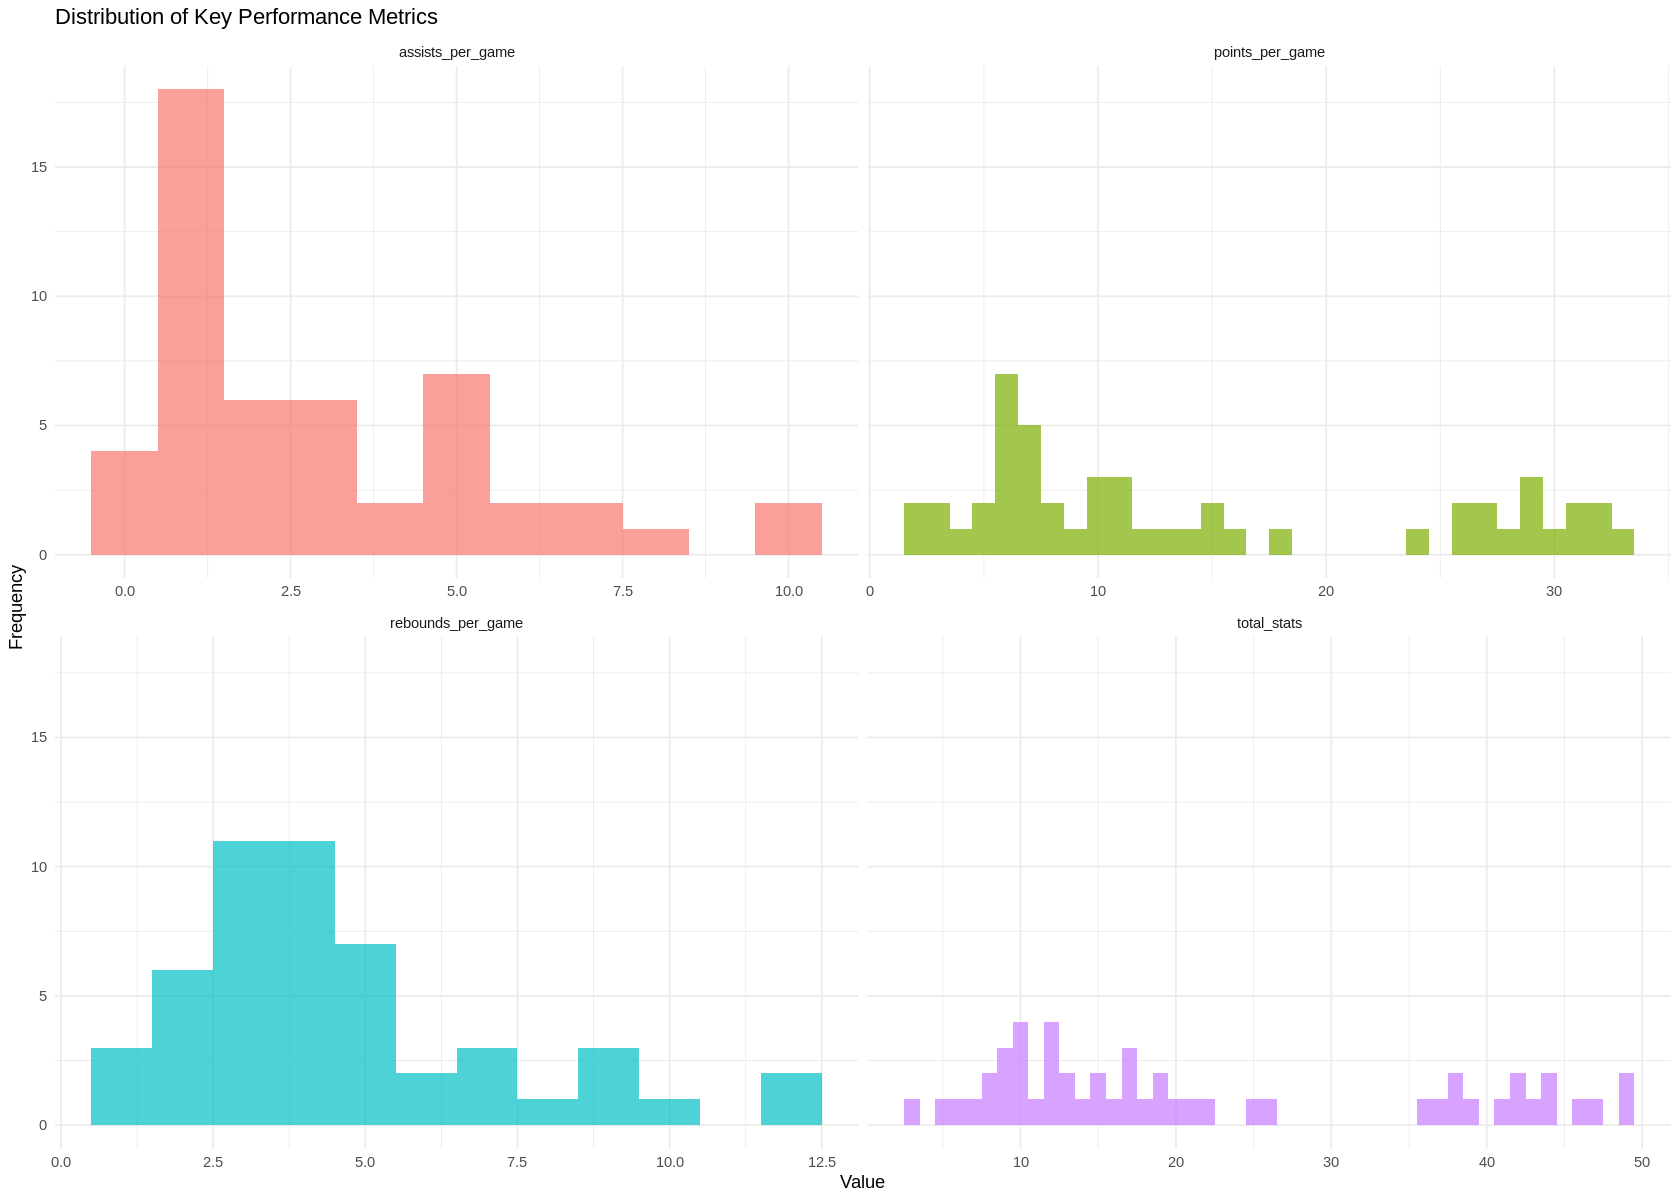

In [ ]:
# Prepare the data for visualization
distribution_data <- nba_data %>%
  select(points_per_game, rebounds_per_game, assists_per_game, total_stats) %>%
  pivot_longer(cols = c(points_per_game, rebounds_per_game, assists_per_game, total_stats),
               names_to = "metric", values_to = "value")

# Create the faceted histogram plot
faceted_histograms <- ggplot(distribution_data, aes(x = value, fill = metric)) +
  geom_histogram(binwidth = 1, alpha = 0.7, position = "dodge") +
  facet_wrap(~ metric, scales = "free_x") +
  labs(title = "Distribution of Key Performance Metrics",
       x = "Value",
       y = "Frequency") +
  theme_minimal() +
  theme(legend.position = "none")

options(repr.plot.width = 14, repr.plot.height = 10)
# View the plot
print(faceted_histograms)

#### Distribution of Assists per Game
**Observations**:
- Most players have fewer than 2.5 assists per game, indicating they are not primary playmakers.
- A small peak around 5 assists per game suggests a few players with moderate playmaking roles.
- Very few players average more than 7.5 assists per game, highlighting the rarity of high-assist players.



#### Distribution of Points per Game

**Observations**:
- Most players score between 0 and 10 points per game, suggesting many are role players.
- A distinct group scores between 25 and 35 points per game, representing primary scorers.
- There is a significant gap between high-volume scorers and the rest, indicating varied scoring roles.

#### Distribution of Rebounds per Game


**Observations**:
- Most players average between 2 and 5 rebounds per game, showing moderate contributions.
- A gradual decline in players as rebounds increase, with a few averaging more than 7.5 rebounds.
- Very few players average more than 10 rebounds per game, indicating elite rebounders are rare.

### Summary of Distributions of Key Variables

- **Points per Game**: A clear distinction between high-volume scorers and role players.
- **Rebounds per Game**: Moderate contributions are common, with elite rebounders being rare.
- **Assists per Game**: Most players are not primary playmakers, with a few standout high-assist players.

These insights highlight the diversity in player roles and contributions within the NBA.

### Relationships Between Variables

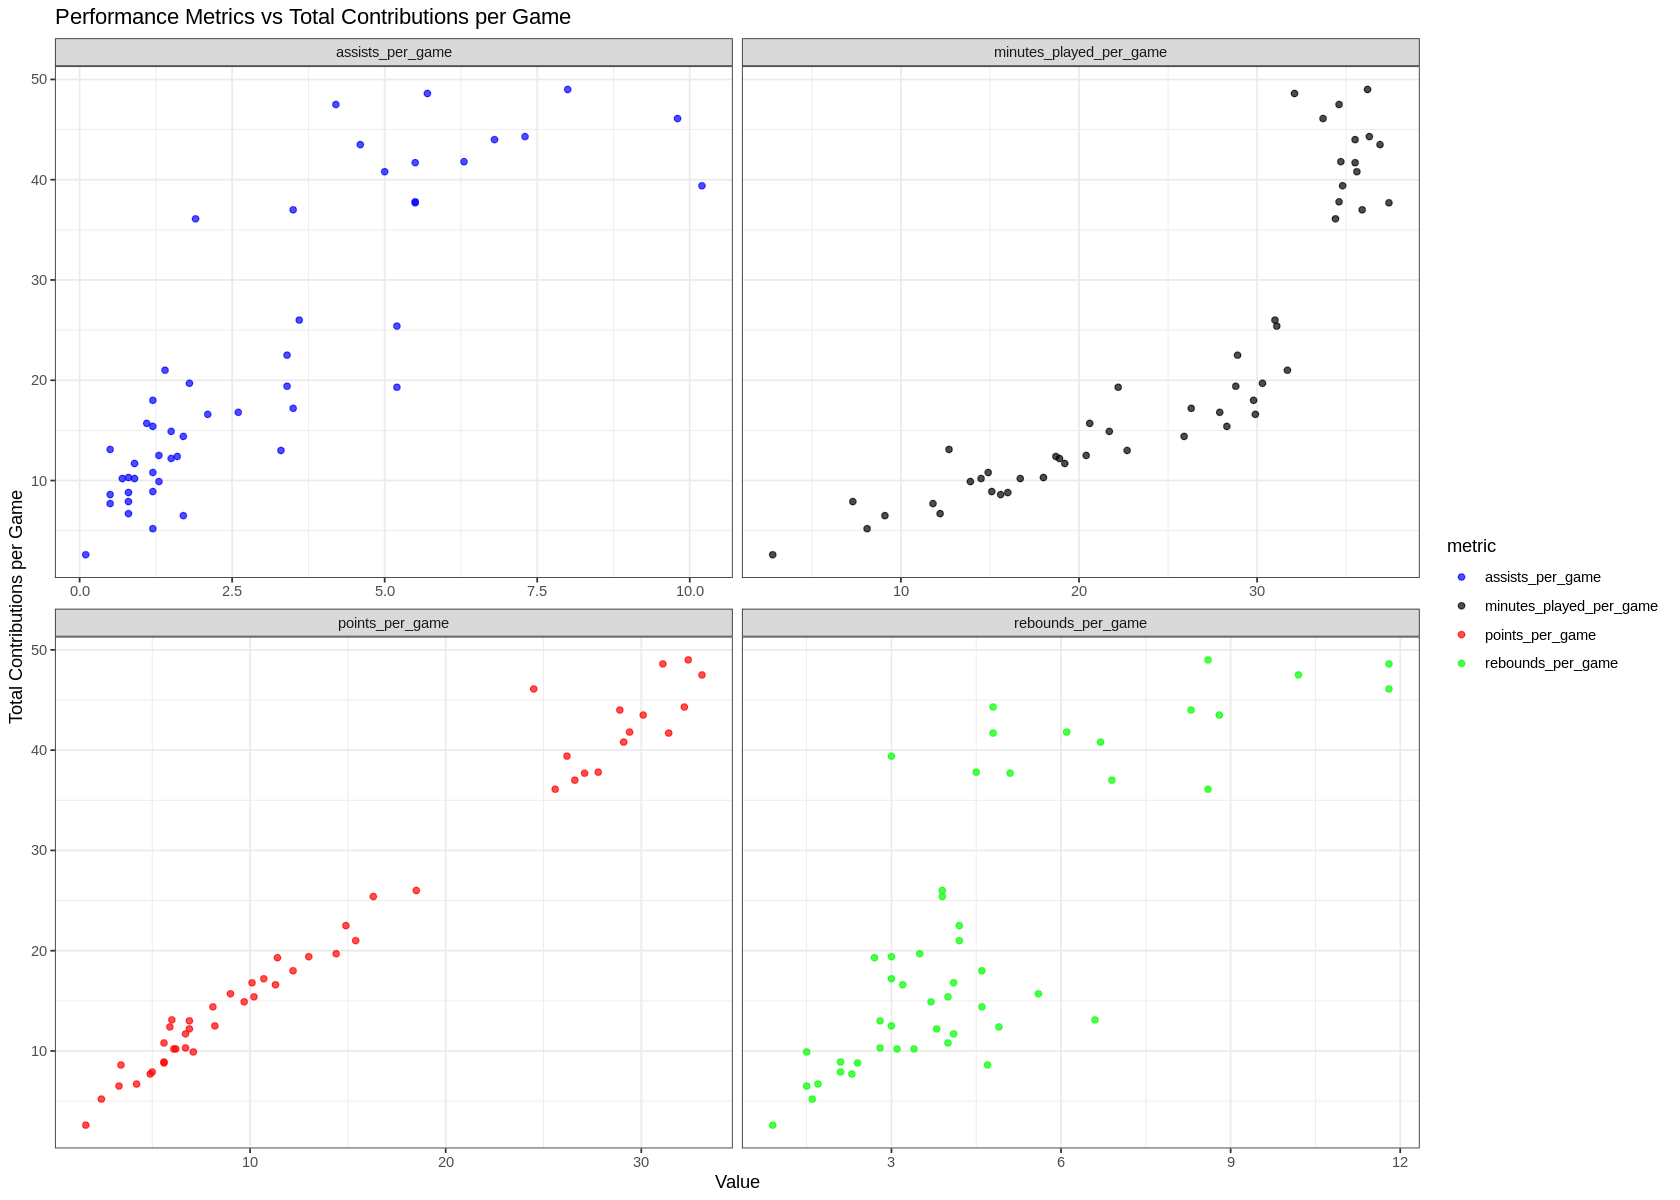

In [ ]:
# Prepare the data for visualization
scatter_data <- nba_data %>%
  select(points_per_game, rebounds_per_game, assists_per_game, minutes_played_per_game, total_stats) %>%
  pivot_longer(cols = c(points_per_game, rebounds_per_game, assists_per_game, minutes_played_per_game),
               names_to = "metric", values_to = "value")

# Create the faceted scatter plot
faceted_scatter_plot <- ggplot(scatter_data, aes(x = value, y = total_stats)) +
  geom_point(aes(color = metric), alpha = 0.7) +
  facet_wrap(~ metric, scales = "free_x") +
  labs(title = "Performance Metrics vs Total Contributions per Game",
       x = "Value",
       y = "Total Contributions per Game") +
  scale_color_manual(values = c("blue", "black", "red", "green")) +
  theme_bw()

# View the plot
print(faceted_scatter_plot)


### Observations and Comments

1. **Assists per Game vs Total Contributions:**
   - There is a positive correlation between assists per game and total contributions per game. Players who have higher assists per game tend to have higher total contributions.
   - The spread is more noticeable at lower assist values, indicating a diverse range of total contributions even with lower assist numbers.

2. **Minutes Played per Game vs Total Contributions:**
   - A clear positive correlation exists between minutes played per game and total contributions per game. As players spend more time on the court, their total contributions increase.
   - This plot highlights that players with high playing minutes generally have higher total stats, which aligns with expectations since more playing time offers more opportunities to contribute.

3. **Points per Game vs Total Contributions:**
   - The relationship between points per game and total contributions per game is almost linear, indicating that points per game is a strong indicator of total contributions.
   - Players who score more points per game tend to have significantly higher total contributions, suggesting that scoring is a major factor in overall player performance.

4. **Rebounds per Game vs Total Contributions:**
   - There is a positive correlation between rebounds per game and total contributions per game, but it is less pronounced compared to points per game and minutes played per game.
   - The data points are more scattered, indicating that while rebounds contribute to total stats, they might not be as dominant a factor as points or assists.

### Summary

- **Strongest Correlation:** Points per game shows the strongest and most linear correlation with total contributions, indicating that scoring heavily influences a player's total contributions.
- **Moderate Correlations:** Assists per game and minutes played per game also show positive correlations with total contributions, highlighting their importance in overall player performance.
- **Least Pronounced Correlation:** Rebounds per game, while positively correlated with total contributions, show a more scattered relationship, suggesting it is a contributing factor but not as dominant as points or assists.
- **Overall Trend:** The plots collectively suggest that players who score more points, play more minutes, and provide more assists tend to have higher total contributions, with points per game being the most significant single metric.


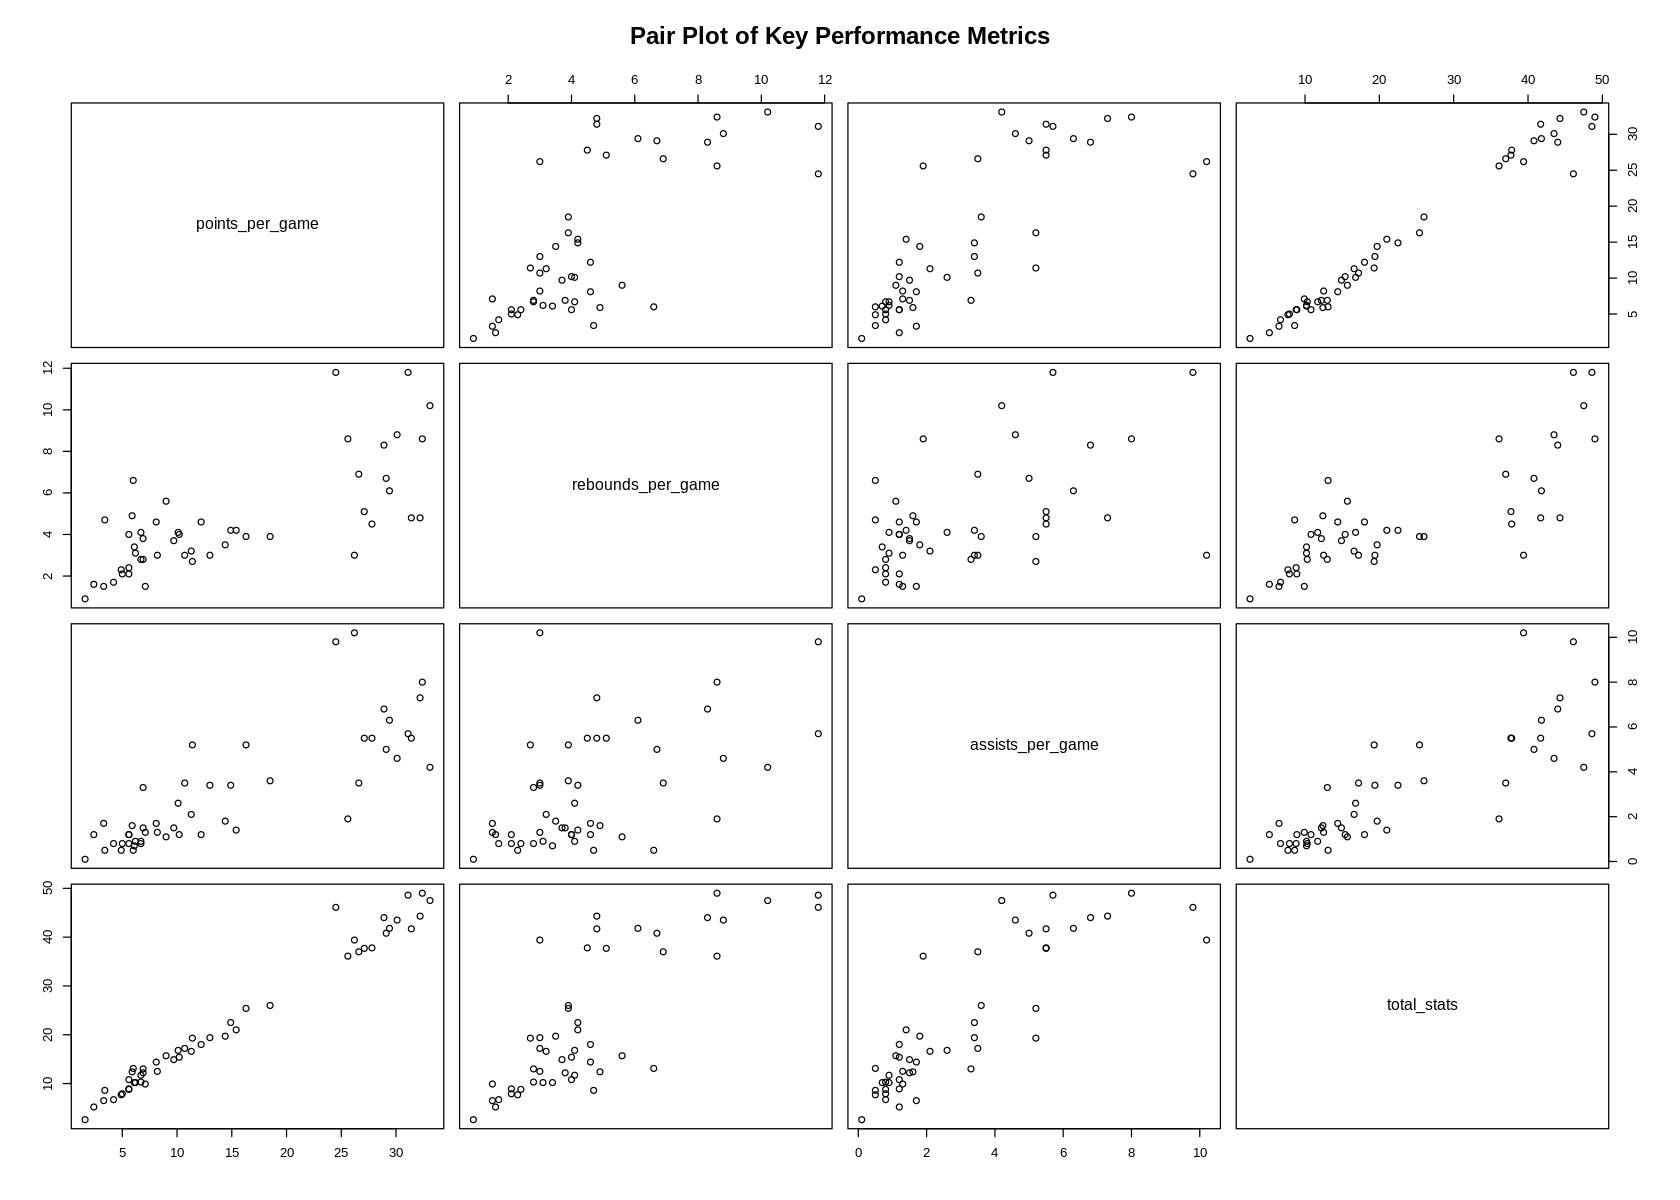

In [ ]:
# Pair plot for all variables
pairs(nba_data[, c("points_per_game", "rebounds_per_game", "assists_per_game", "total_stats")],
      main = "Pair Plot of Key Performance Metrics")

**Observations**:
- Positive correlations exist between points, rebounds, assists, and total contributions.
- The pair plot illustrates that players who excel in one area (e.g., scoring, rebounding) often perform well in other areas, contributing to higher overall performance.

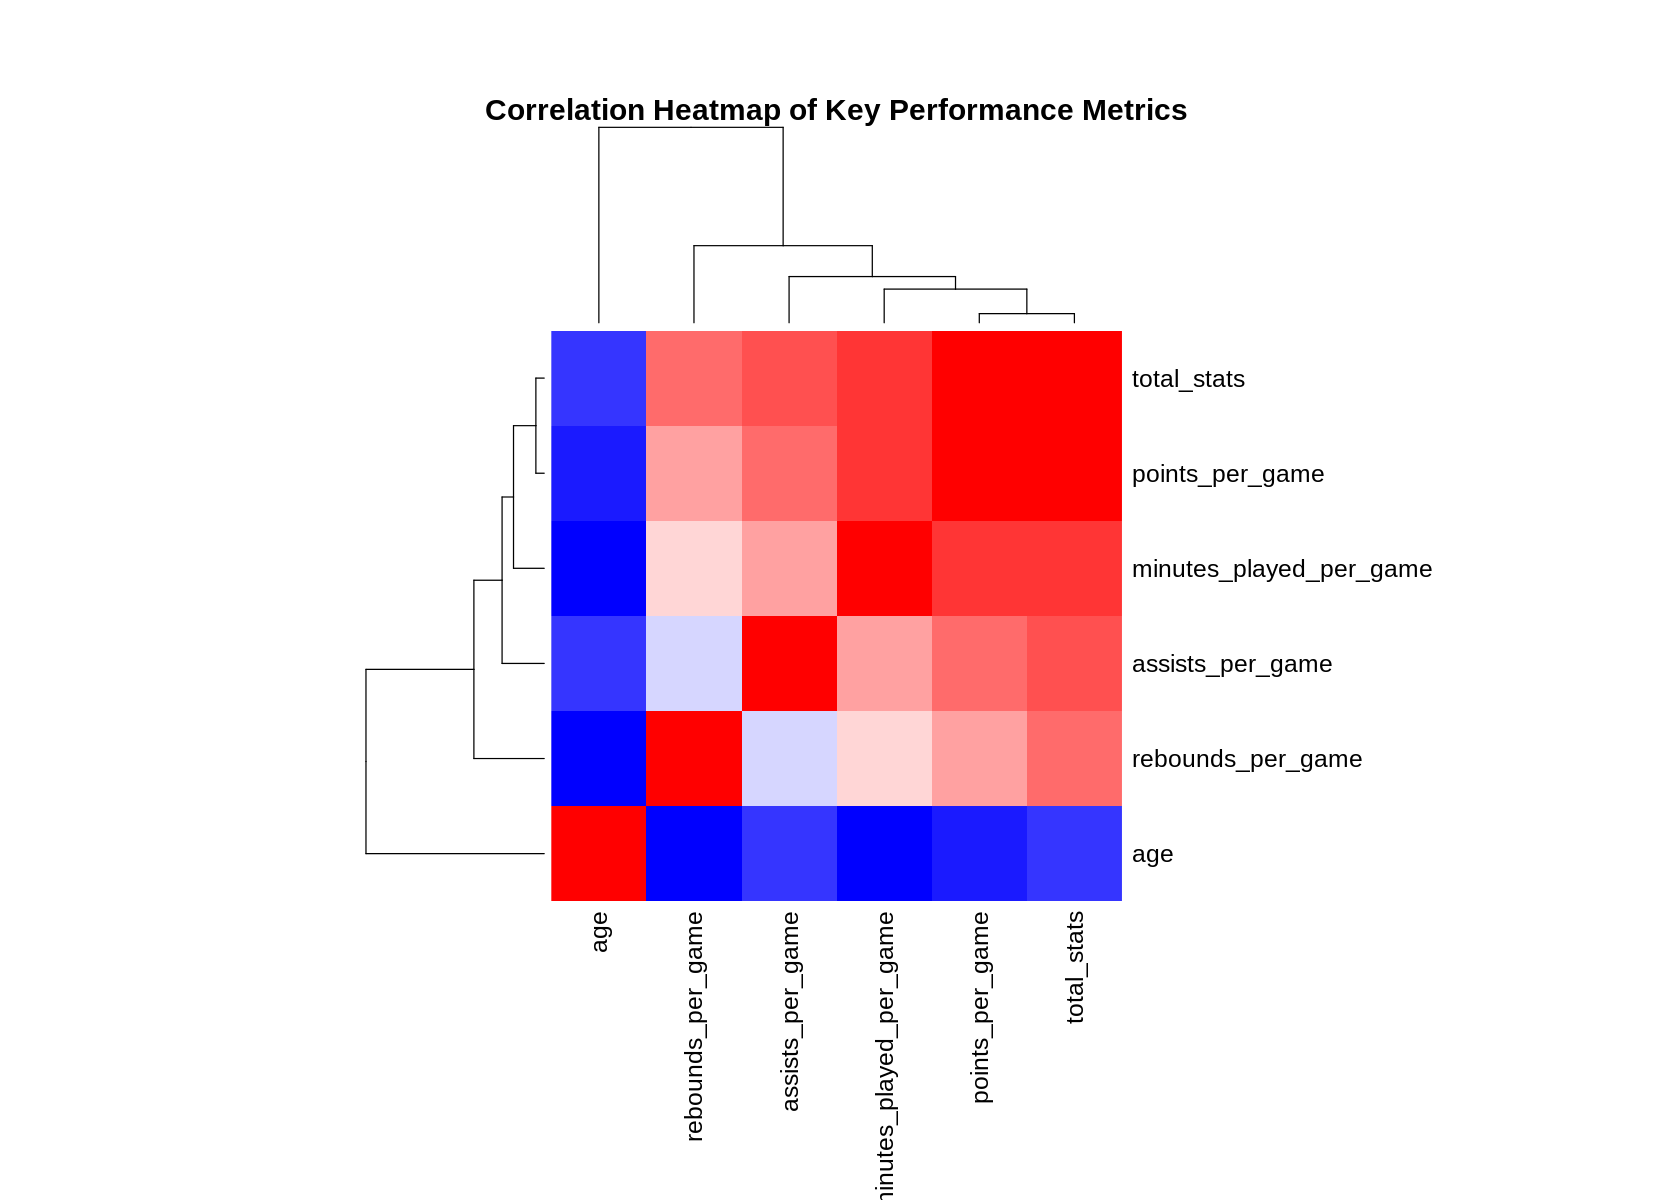

In [ ]:
# Correlation Heatmap
cor_matrix <- cor(nba_data[, c("points_per_game", "rebounds_per_game", "assists_per_game", "total_stats", "minutes_played_per_game", "age")])
# Set up the plot size
par(oma = c(5, 5, 5, 5), mar = c(5, 5, 5, 5))  # Adjust outer and margin areas for larger plot
# Generate the heatmap
heatmap(cor_matrix,
        main = "Correlation Heatmap of Key Performance Metrics",
        col = colorRampPalette(c("blue", "white", "red"))(20),
        scale = "none",
        margins = c(10, 10))

Observations:

- Strong positive correlations between points, rebounds, assists, and total contributions.
- Minutes played per game is positively correlated with all performance metrics.
- Age has a weaker correlation with performance metrics, suggesting other factors play a larger role in player contributions. Thats why it is not considered while clustering.


### Summary of Relationships Between Variables

- **Points per Game vs Total Contributions**: Strong positive correlation, indicating scoring significantly impacts overall contributions.
- **Rebounds per Game vs Total Contributions**: Positive correlation, showing the importance of rebounding.
- **Assists per Game vs Total Contributions**: Positive correlation, highlighting the value of assists in total contributions.
- **Pair Plot**: Positive correlations among all key performance metrics, suggesting well-rounded players excel in multiple areas.
- **Heatmap**: minutes played per game has positively correlated with all performance metrics, play more achieve more, age does not have a strong effect in performance metrics

These visualizations provide insights into how different performance metrics contribute to the overall impact of NBA players.


## Boxplots

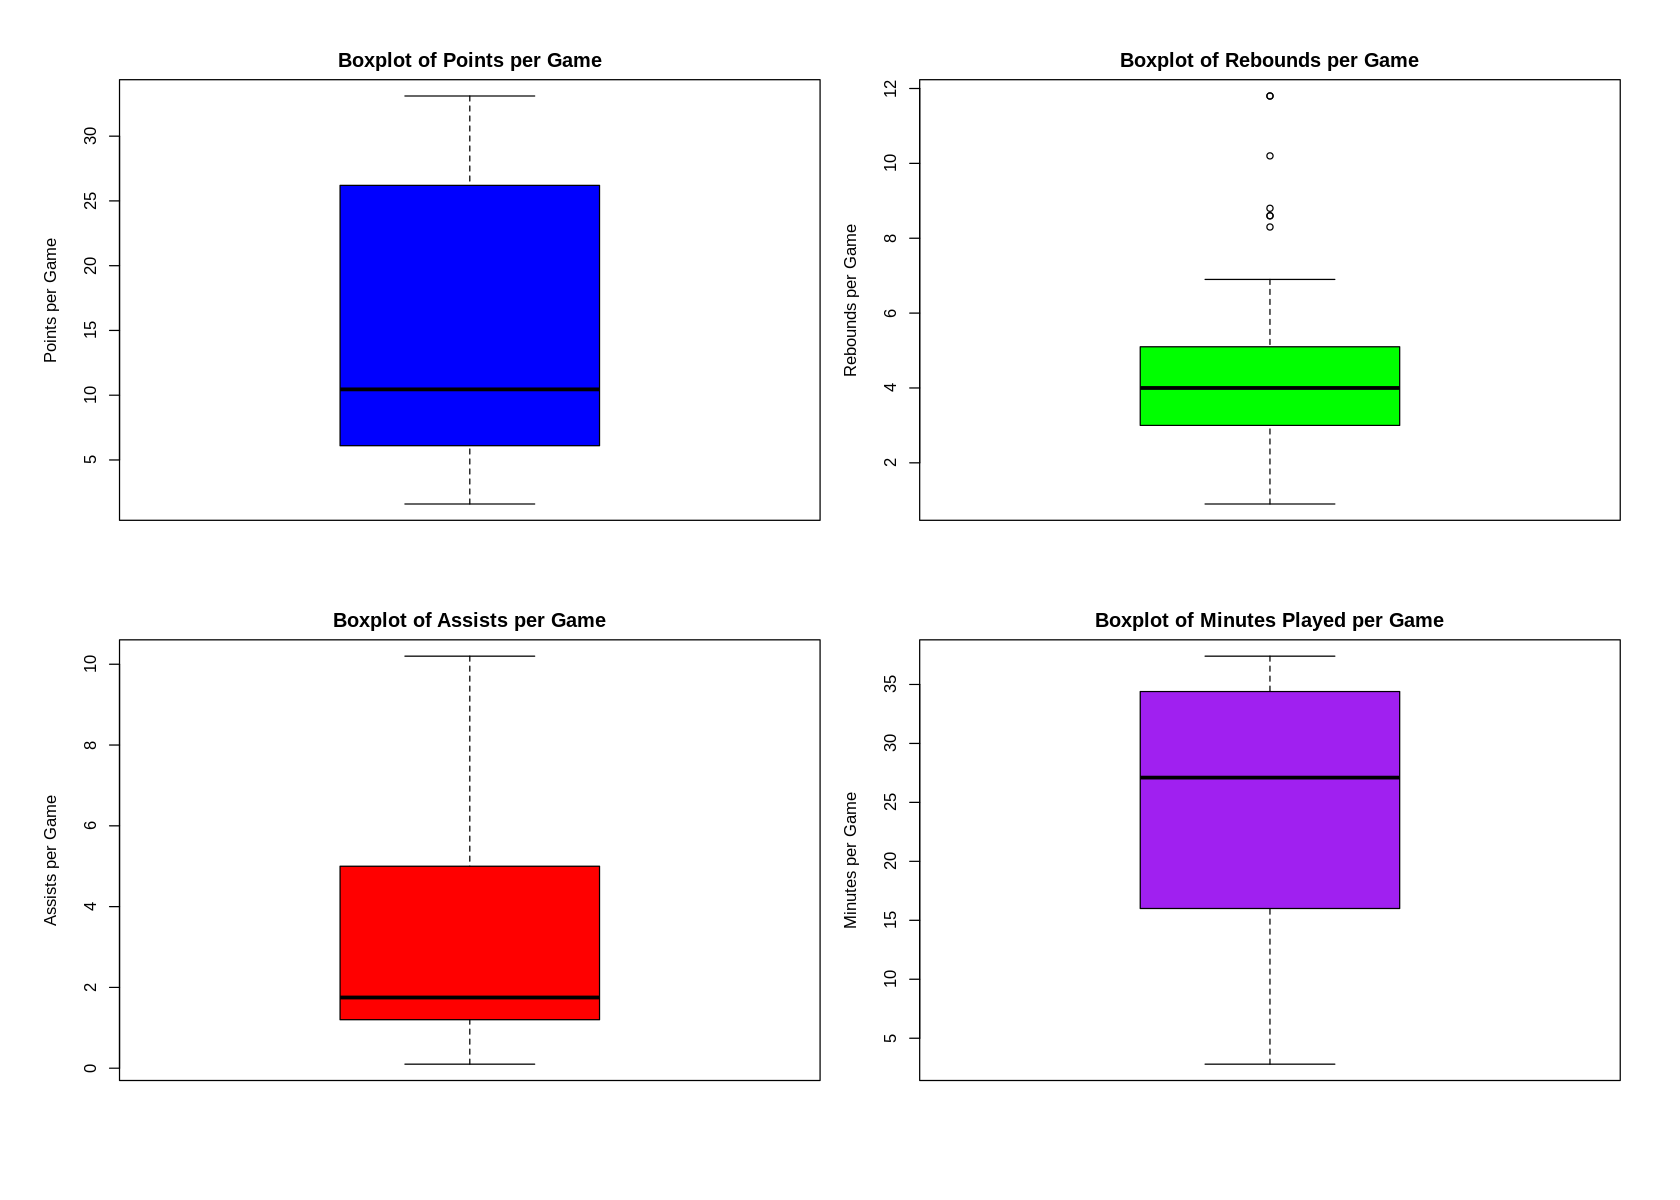

In [ ]:
# Set up the plot layout for multiple plots
par(mfrow = c(2, 2), oma = c(2, 2, 2, 2), mar = c(4, 4, 2, 1))  # 2x2 grid, outer and margin area adjustments

# Boxplot of Points per Game
boxplot(nba_data$points_per_game,
        main = "Boxplot of Points per Game",
        col = "blue",
        ylab = "Points per Game")

# Boxplot of Rebounds per Game
boxplot(nba_data$rebounds_per_game,
        main = "Boxplot of Rebounds per Game",
        col = "green",
        ylab = "Rebounds per Game")

# Boxplot of Assists per Game
boxplot(nba_data$assists_per_game,
        main = "Boxplot of Assists per Game",
        col = "red",
        ylab = "Assists per Game")

# Boxplot of Minutes Played per Game
boxplot(nba_data$minutes_played_per_game,
        main = "Boxplot of Minutes Played per Game",
        col = "purple",
        ylab = "Minutes per Game")

#### Boxplot of Points per Game

**Observations**:
- The interquartile range (IQR) for points per game is between approximately 6 and 26 points. This range captures the middle 50% of the players' scoring.
- The median points per game is approximately 10, indicating that half of the players score below this value and half score above it.
- There are no significant outliers, as the maximum points per game is around 33, which falls within the expected range.

#### Boxplot of Rebounds per Game

**Observations**:
- The IQR for rebounds per game is between approximately 3 and 5 rebounds.
- The median rebounds per game is 4, showing that half of the players have fewer than 4 rebounds per game and half have more.
- Several outliers are observed above 9 rebounds per game, indicating a few players excel significantly in rebounding, with a maximum of 12 rebounds per game.

#### Boxplot of Assists per Game

**Observations**:
- The IQR for assists per game is between approximately 1 and 5 assists.
- The median assists per game is around 2, indicating that half of the players have fewer than 2 assists per game and half have more.
- There are some high-assist outliers, with the maximum assists per game being 10, highlighting key playmakers.

#### Boxplot of Minutes Played per Game

**Observations**:
- The IQR for minutes played per game is between approximately 16 and 34 minutes.
- The median minutes per game is around 27, showing that half of the players play fewer than 27 minutes and half play more.
- The maximum minutes played per game is 37, with no significant outliers, suggesting most players' playing time falls within this range.

### Summary with considering the summary statistics to be more precise

- **Points per Game**: Most players score between 6.125 and 26.05 points per game. The median is 10.45, with no significant outliers.
- **Rebounds per Game**: The majority of players average between 3.0 and 5.05 rebounds per game. The median is 4.0, with several outliers above 9 rebounds.
- **Assists per Game**: Most players have between 1.2 and 4.9 assists per game. The median is 1.75, with some high-assist outliers.
- **Minutes Played per Game**: Players typically play between 16.18 and 34.23 minutes per game. The median is 27.1, with no significant outliers.

These boxplots provide a clear view of the distribution patterns and outliers in key performance metrics among NBA players, highlighting the range of contributions in scoring, rebounding, assists, and playing time.













#[MACHINE LEARNING METHOD](#MACHINE-LEARNING-METHOD)

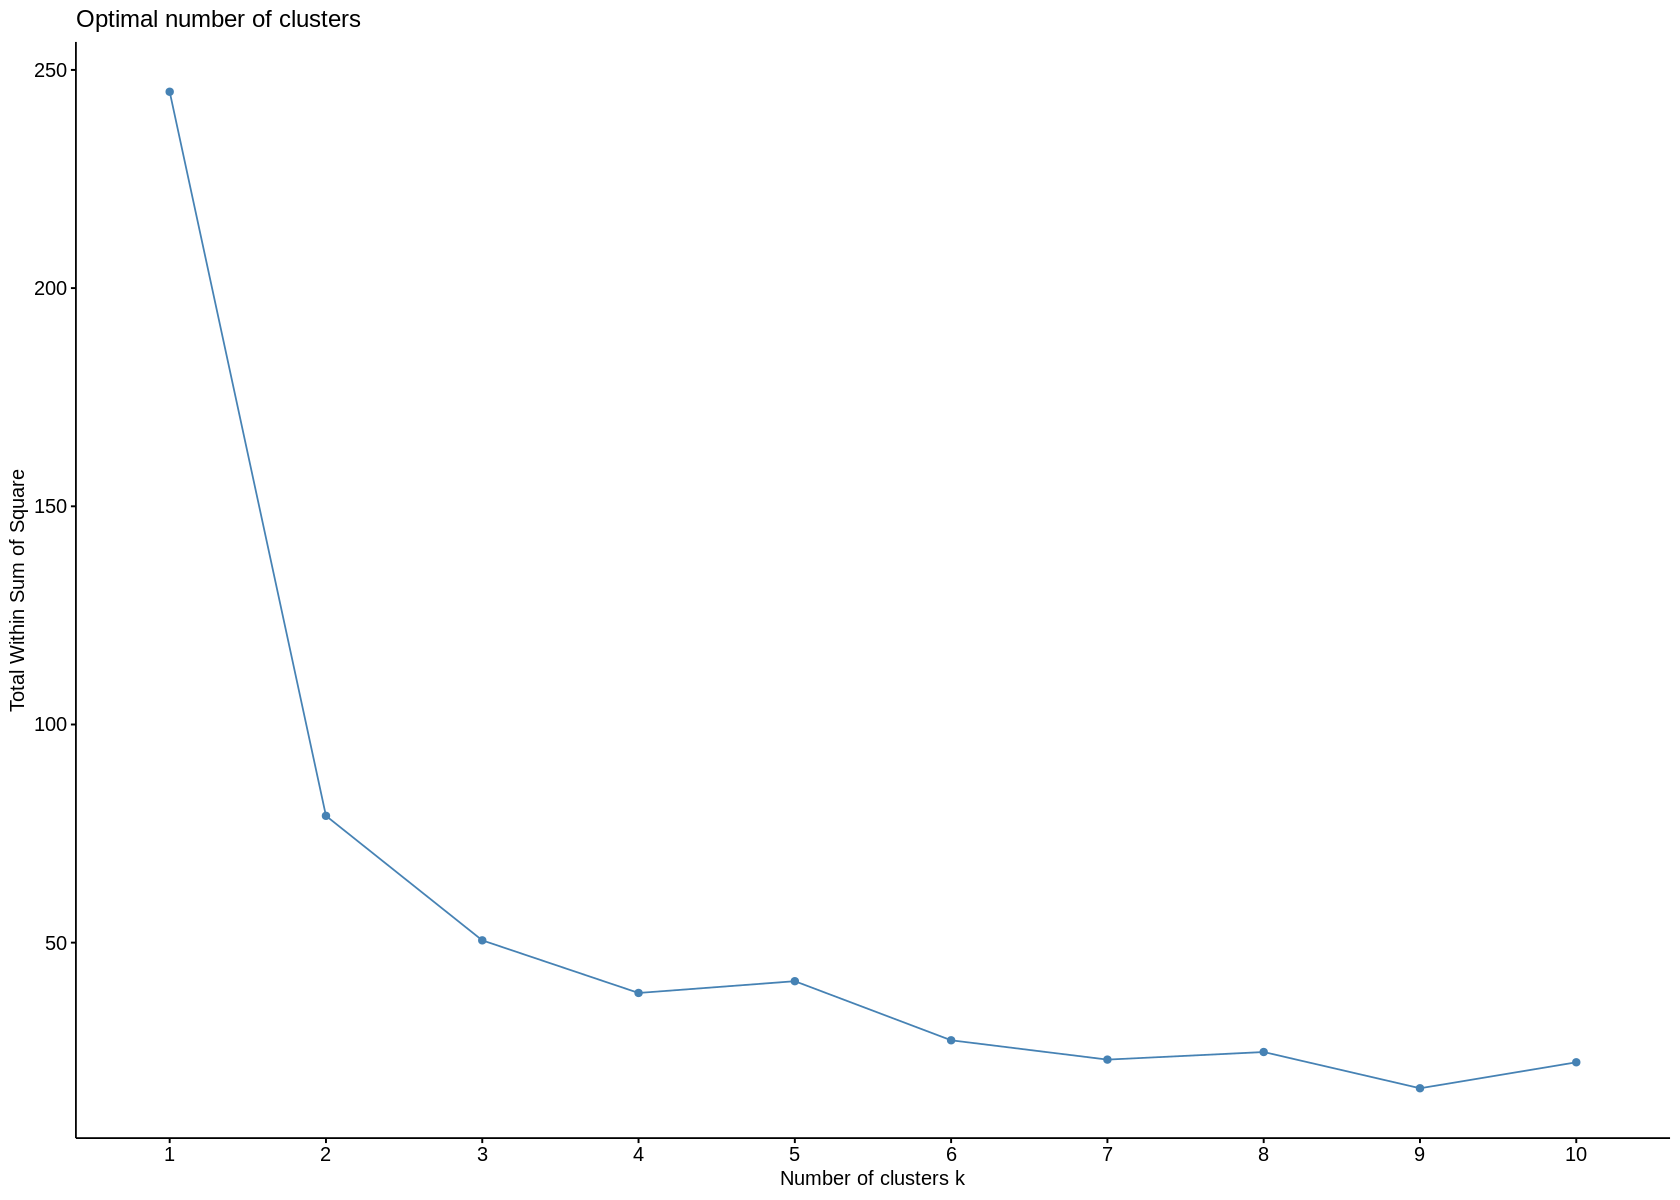

In [ ]:
# Select and scale the relevant features and store as k_means_data
k_means_data <- nba_data %>%
select(minutes_played_per_game, points_per_game, rebounds_per_game, assists_per_game, total_stats) %>%
scale()

# Run the fviz_nbclust function with our selected data and method "wss"
elbow_method <- fviz_nbclust(k_means_data, FUNcluster = kmeans, method = "wss")

# View the plot
elbow_method

By visualizing the Elbow Method plot (elbow_method), you can make an informed decision about the appropriate number of clusters for your k-means clustering algorithm. Typically, the optimal number of clusters is chosen at the point where the WSS starts to diminish at a slower rate, forming an "elbow." In this case, the elbow point suggests that 2 or 3 clusters are optimal.

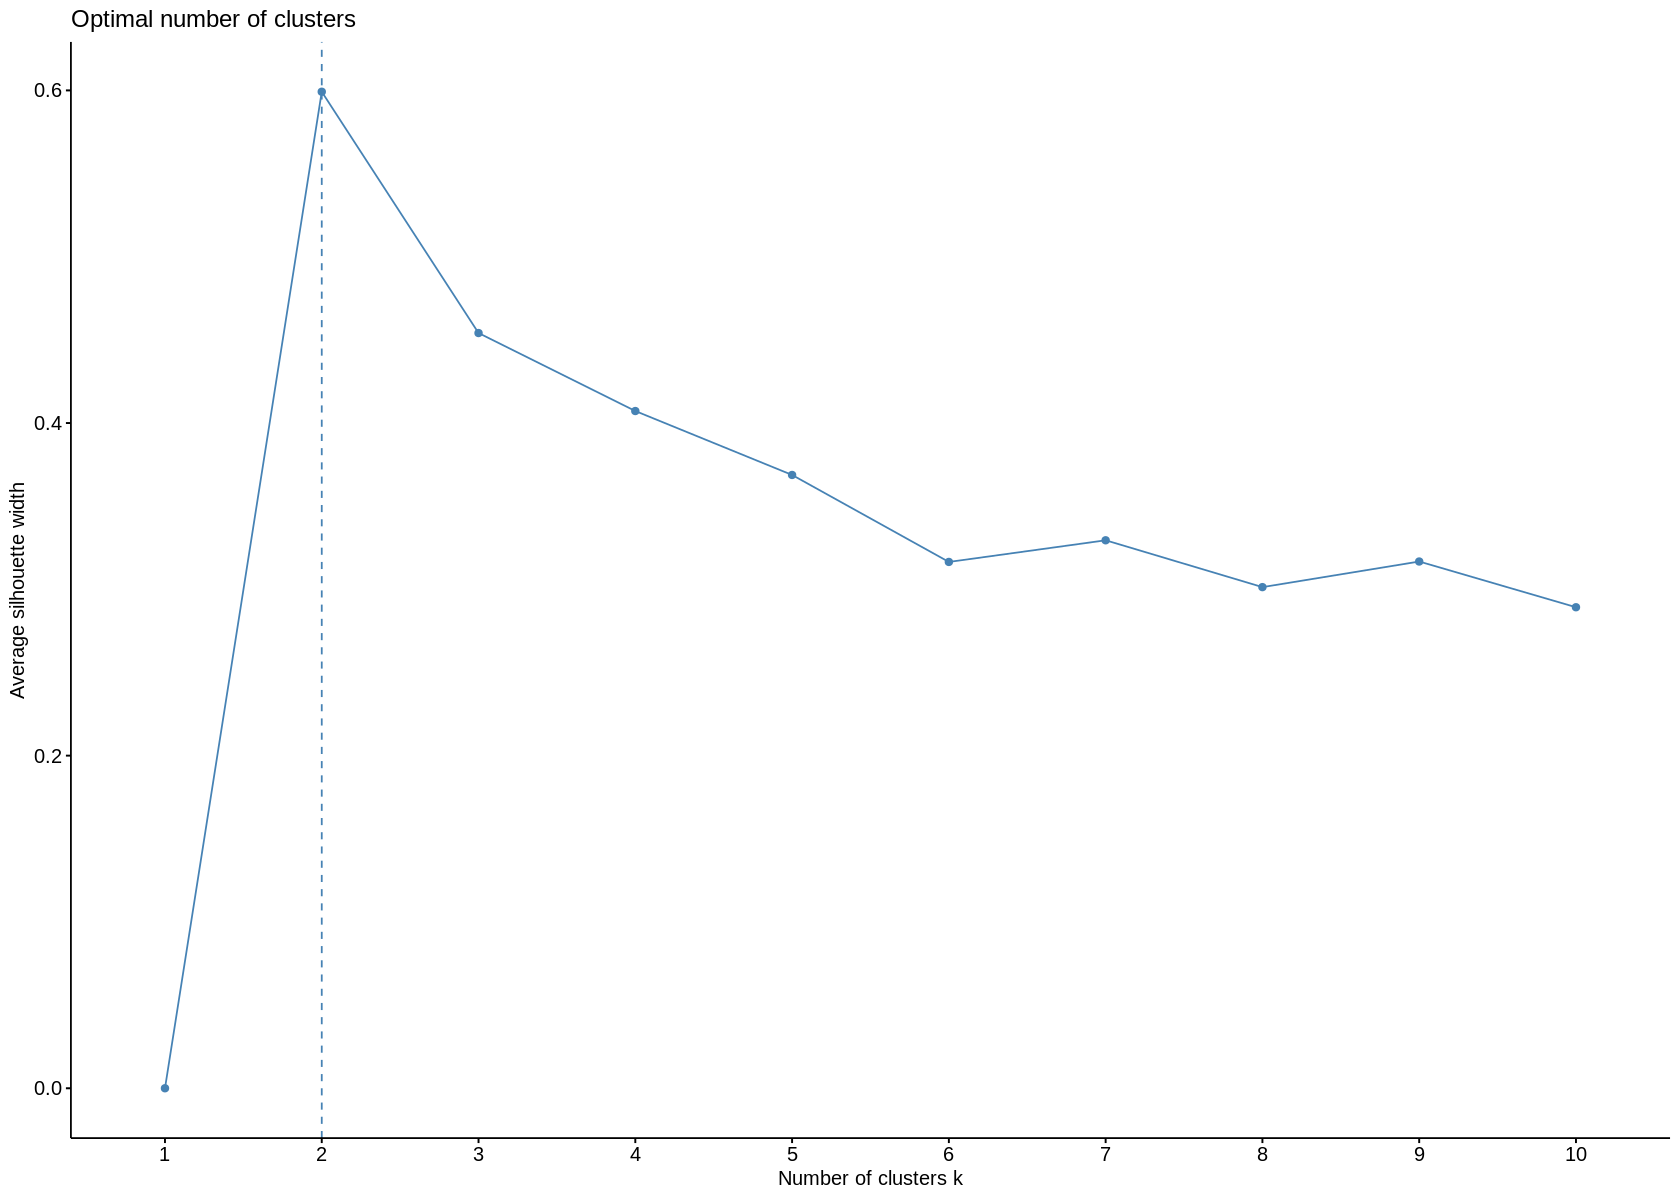

In [ ]:
# Run the fviz_nbclust function with the method "silhouette"
silhouette_method <- fviz_nbclust(k_means_data, FUNcluster = kmeans, method = "silhouette")

# View the plot
silhouette_method

By visualizing the silhouette method plot (silhouette_method), can identify the number of clusters that maximizes the average silhouette width, which provides insight into the quality of the clustering solution. Higher silhouette widths generally indicate better-defined clusters. In this analysis, the optimal number of clusters is determined to be 2.

In [ ]:
# Set a random seed
set.seed(47) # to make sure you get the same results every time.

# Set k equal to the optimal number of clusters
num_clusters <- 2

# Run the k-means algorithm
k_means <- kmeans(x = k_means_data, centers = num_clusters, iter.max = 15, nstart = 25)

# Label the clusters of degrees_clean
nba_labeled <- nba_data %>%
    mutate(clusters = k_means$cluster)

# CLUSTER ANALYSIS

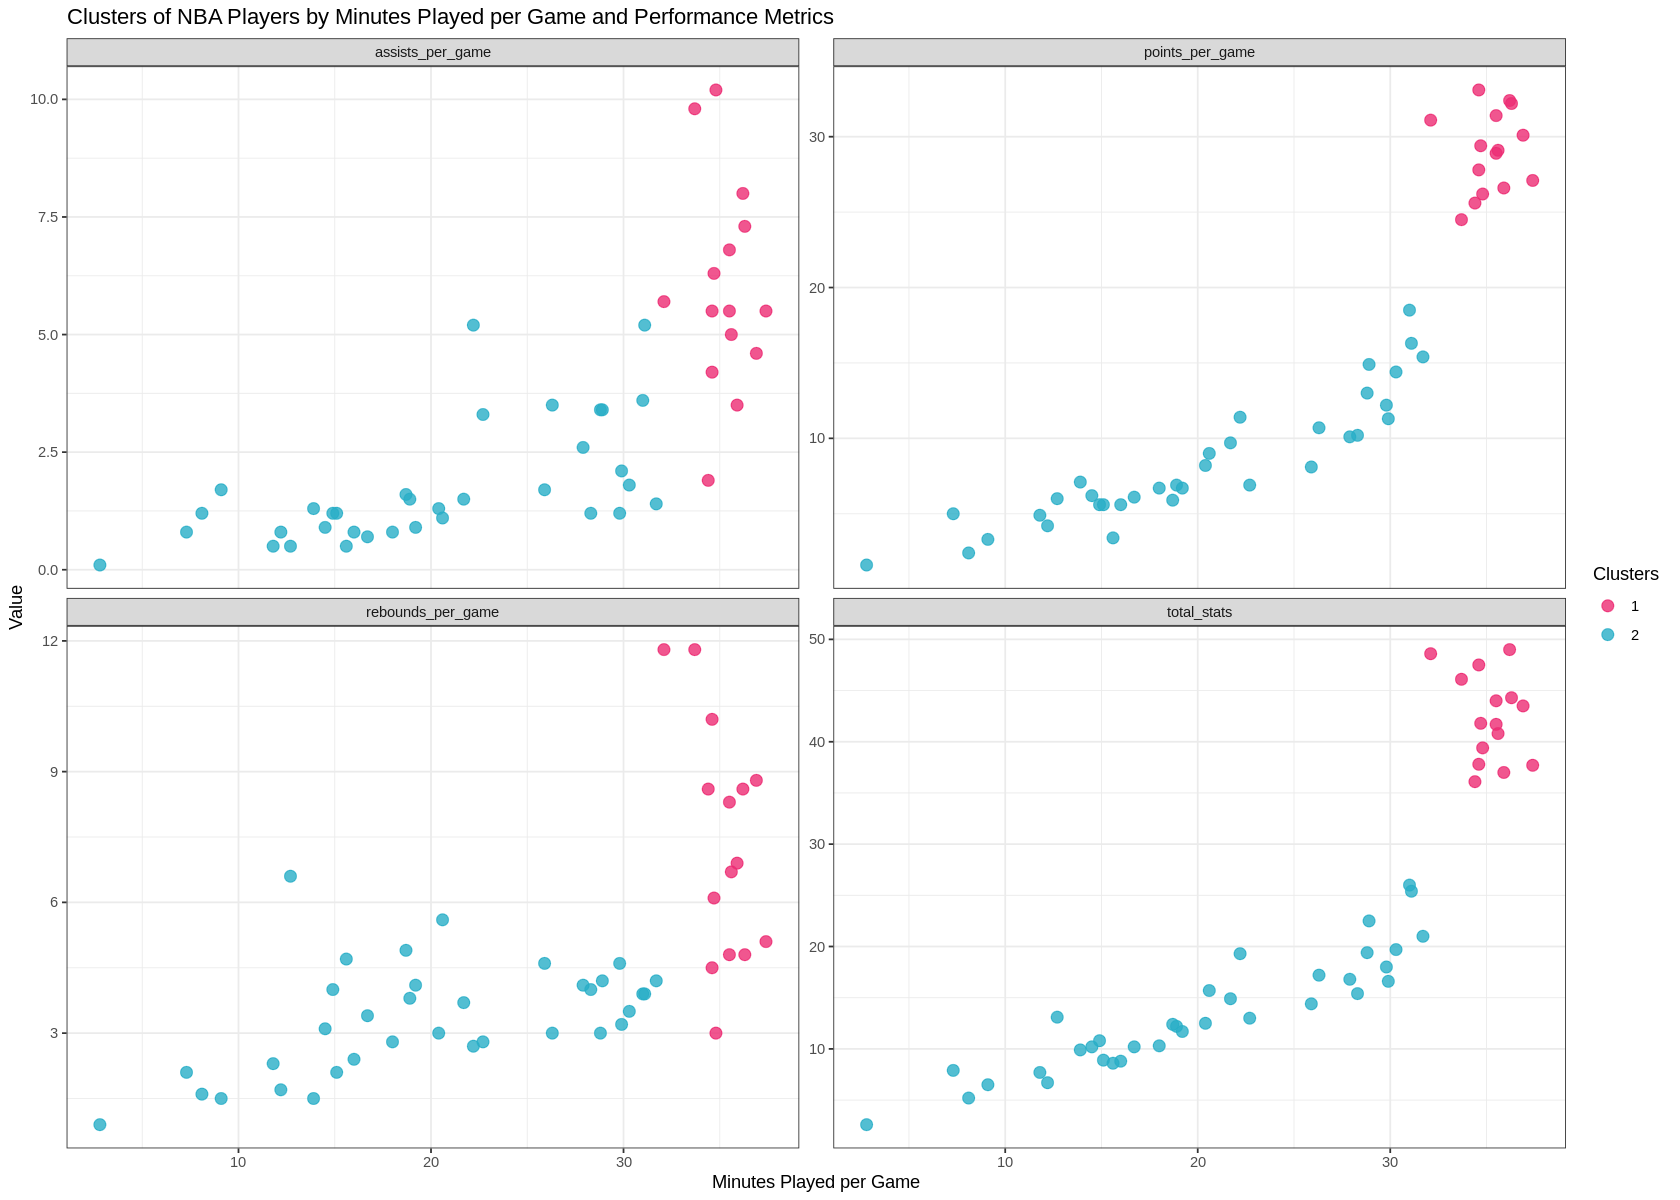

In [ ]:
# Prepare the data for visualization
visualization_data <- nba_labeled %>%
  select(minutes_played_per_game, points_per_game, rebounds_per_game, assists_per_game, total_stats, clusters) %>%
  pivot_longer(cols = c(points_per_game, rebounds_per_game, assists_per_game, total_stats),
               names_to = "metric", values_to = "value")

# Create a grid of scatter plots
grid_plot <- ggplot(data = visualization_data, aes(x = minutes_played_per_game, y = value, color = as.factor(clusters))) +
  geom_point(alpha = 0.8, size = 3) +
  labs(title = "Clusters of NBA Players by Minutes Played per Game and Performance Metrics",
       x = "Minutes Played per Game",
       y = "Value") +
  facet_wrap(~ metric, scales = "free_y") +
  scale_color_manual(name = "Clusters", values = c("#EC2C73", "#29AEC7")) +
  theme_bw()

# View the plot
print(grid_plot)



### Observations and Comments

#### Distribution Across Clusters:

- **Cluster 1 (Pink)**:
  - This cluster consists of players with higher performance metrics across all categories (points, rebounds, assists, and total stats).
  - Players in this cluster generally have high minutes played per game.
  - These players are likely the top performers and key contributors in their teams.

- **Cluster 2 (Blue)**:
  - Players in this cluster have lower performance metrics in comparison to Cluster 1.
  - This cluster includes players with varying minutes played per game, but generally lower than those in Cluster 1.
  - These players might be role players or have less impact on the overall game performance.

#### Correlation Between Metrics:

- There is a clear positive correlation between minutes played per game and the individual performance metrics such as points, rebounds, assists, and total stats.
- Players who play more minutes tend to accumulate higher stats across all performance metrics, as evident from the upward trend in each scatter plot.

#### Separation of Clusters:

- The separation between the two clusters is quite distinct, particularly in the metrics of points per game, total stats, and minutes_played_per_game.
- Cluster 1 shows significantly higher values in these metrics, indicating a higher overall performance compared to Cluster 2.

### Most Influential Variables

To determine the most influential variable that differentiates the clusters, we can analyze the spread and separation of the clusters in each plot:

- **Total Stats**:
  - The plot for total stats shows a clear separation between the clusters, with Cluster 1 having significantly higher total stats compared to Cluster 2. This indicates that total stats might be the most influential variable in differentiating the clusters.

- **Points per Game**:
  - Similarly, the points per game metric shows a significant distinction between the clusters, particularly highlighting the higher performance of Cluster 1.

- **Minutes Played per Game**:
  - Players who play more minutes tend to accumulate higher stats across all performance metrics, as evident from the upward trend in each scatter plot.



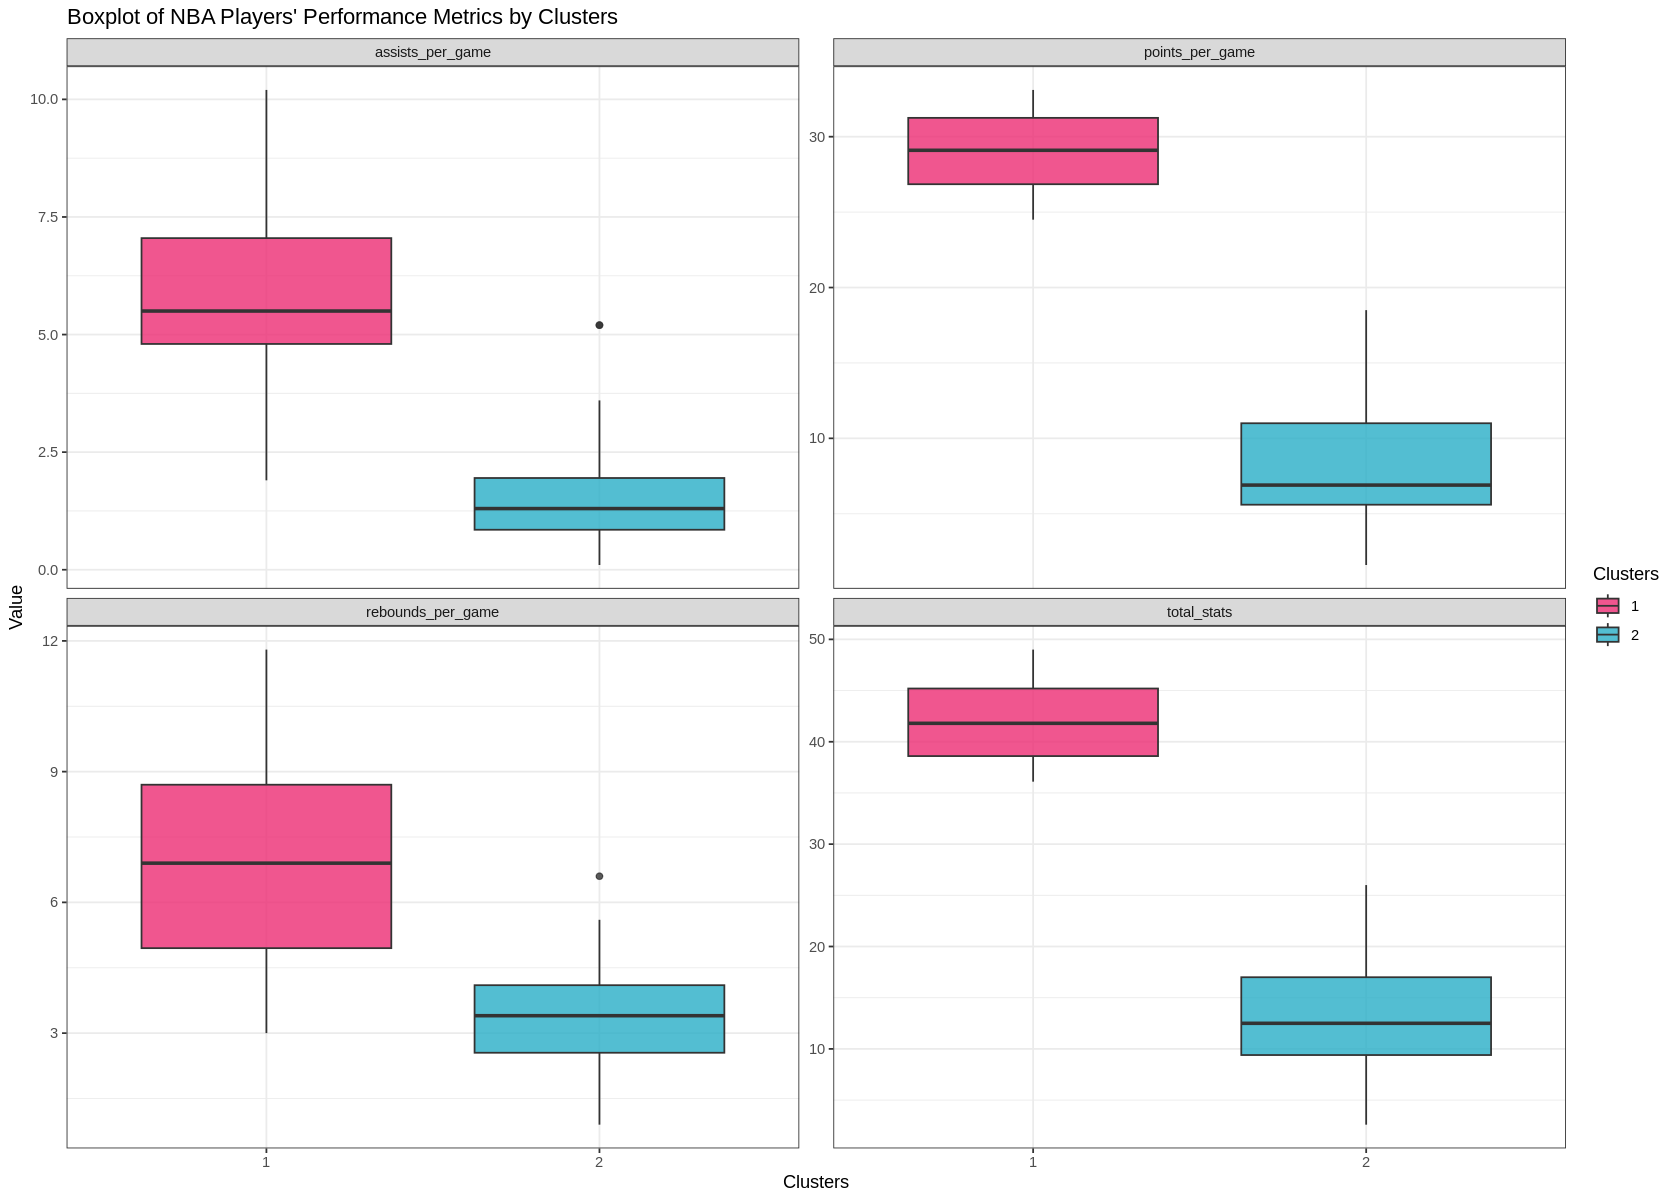

In [ ]:
# Prepare the data for visualization
visualization_data <- nba_labeled %>%
  select(points_per_game, rebounds_per_game, assists_per_game, total_stats, clusters) %>%
  pivot_longer(cols = c(points_per_game, rebounds_per_game, assists_per_game, total_stats),
               names_to = "metric", values_to = "value")

# Create a boxplot
boxplot <- ggplot(data = visualization_data, aes(x = as.factor(clusters), y = value, fill = as.factor(clusters))) +
  geom_boxplot(alpha = 0.8) +
  labs(title = "Boxplot of NBA Players' Performance Metrics by Clusters",
       x = "Clusters",
       y = "Value") +
  facet_wrap(~ metric, scales = "free_y") +
  scale_fill_manual(name = "Clusters", values = c("#EC2C73", "#29AEC7")) +
  theme_bw()

# View the plot
print(boxplot)

### Observations and Comments

#### Distribution Across Clusters:

- **Cluster 1 (Pink)**:
  - **Assists per Game**: Players in Cluster 1 have higher assists per game with a wider range of values, indicating more variability in playmaking abilities.
  - **Points per Game**: Cluster 1 shows consistently high points per game, suggesting that players in this cluster are likely the primary scorers for their teams.
  - **Rebounds per Game**: This cluster also has higher rebounds per game, indicating dominance in rebounding.
  - **Total Stats**: The total stats are significantly higher for players in Cluster 1, reinforcing their overall higher performance across various metrics.

- **Cluster 2 (Blue)**:
  - **Assists per Game**: Players in Cluster 2 have lower assists per game, indicating less involvement in playmaking.
  - **Points per Game**: Points per game are also lower in this cluster, suggesting these players are less likely to be primary scorers.
  - **Rebounds per Game**: This cluster has lower rebounds per game, indicating a lesser impact on rebounding.
  - **Total Stats**: The total stats are significantly lower for players in Cluster 2, suggesting overall lower performance compared to Cluster 1.

#### General Comments:

- **Separation of Clusters**: The boxplots reveal a clear separation between the two clusters across all performance metrics. Cluster 1 consistently shows higher values, while Cluster 2 shows lower values.
- **Variability**: Cluster 1 displays more variability within assists per game and rebounds per game, indicating a broader range of player contributions in these areas. Conversely, Cluster 2 shows less variability, suggesting more consistent but lower performance.
- **Performance Indicators**: The consistently higher metrics for Cluster 1 across points per game, rebounds per game, assists per game, and total stats indicate that this cluster represents the top-performing players who are central to their teams’ success.
- **Role Differentiation**: The distinct difference in performance metrics suggests that Cluster 1 players are likely star players with significant playing time and key roles, whereas Cluster 2 players may be role players with less impact on the game.

Overall, the boxplots provide a clear visual distinction between the two clusters, highlighting the superior performance of Cluster 1 across multiple metrics.


#[CONCLUSION](#CONCLUSION)

### Conclusions

#### Key Steps in the Project

1. **Data Import and Cleaning**:
   - Importing the NBA player dataset and performing initial cleaning to ensure data quality and consistency.

2. **Feature Engineering**:
   - Creating the `total_stats` variable to combine points, rebounds, and assists, providing a comprehensive measure of player performance.
   - Setting player names as row names to facilitate easier identification and reference.

3. **Exploratory Data Analysis (EDA)**:
   - Conducting summary statistics to gain a basic understanding of the data.
   - Visualizing distributions of key variables to identify patterns and outliers.
   - Analyzing relationships between variables to understand how different performance metrics interact.

4. **Clustering Analysis**:
   - Selecting and scaling relevant features for clustering.
   - Applying the elbow and silhouette methods to determine the optimal number of clusters.
   - Performing k-means clustering and labeling the clusters.

5. **Visualization and Interpretation**:
   - Creating scatter plots and boxplots to visualize the distribution and separation of clusters.
   - Analyzing the plots to identify key differences and make observations about player roles and performance.
